<a href="https://colab.research.google.com/github/EagleVector/CNN/blob/main/POC_Conv_Pool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pwd

'/content'

In [11]:
import os
ROOT = "/content/drive/MyDrive/ColabNotebooks"
os.chdir(ROOT)

In [12]:
os.getcwd()

'/content/drive/MyDrive/ColabNotebooks'

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [14]:
from google.colab.patches import cv2_imshow
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    return img
  try:
    cv2.imshow("display", img)
    return img
  except Exception as e:
    print(e)
    cv2_imshow(img)
    return img


In [15]:
img_path = "car1.jpeg"

array([[237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       [237, 237, 237, ..., 237, 237, 237],
       ...,
       [216, 216, 216, ..., 211, 211, 211],
       [217, 217, 217, ..., 213, 213, 213],
       [217, 217, 217, ..., 214, 214, 214]], dtype=uint8)

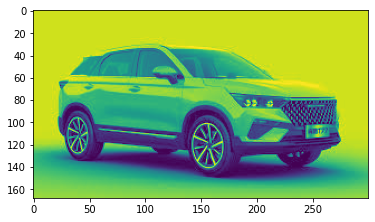

In [16]:
car = read_img(path=img_path, grayscale=True)
car

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



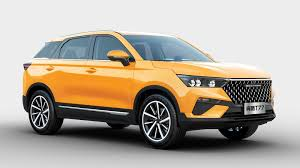

array([[[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       ...,

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [211, 211, 211]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [213, 213, 213],
        [213, 213, 213],
        [213, 213, 213]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

In [17]:
color_car = read_img(path=img_path, grayscale=False)
color_car

In [18]:
car.shape

(168, 300)

In [19]:
color_car.shape

(168, 300, 3)

### Apply a Single Convolutional layer

In [20]:
row, column = car.shape
batch = 1 #single image
channel = 1 #grayscale
reshaped_car_img = car.reshape(batch, row, column, channel)
reshaped_car_img.shape

(1, 168, 300, 1)

In [21]:
input_shape = reshaped_car_img.shape[1:]
CONV_LAYERS = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape = input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYERS)

In [22]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Kernel size is 3*3 i.e no. of weights are 9 and 1 bias is also present. So total no. of trainable params are 10

In [23]:
out = conv_model.predict(reshaped_car_img)
out

1/1 [==============================] - 7s 7s/step


array([[[[-52.459045],
         [-52.459045],
         [-52.459045],
         ...,
         [-52.459045],
         [-52.459045],
         [-52.459045]],

        [[-52.459045],
         [-52.459045],
         [-52.459045],
         ...,
         [-52.459045],
         [-52.459045],
         [-52.459045]],

        [[-52.459045],
         [-52.459045],
         [-52.459045],
         ...,
         [-52.459045],
         [-52.459045],
         [-52.459045]],

        ...,

        [[-48.33278 ],
         [-48.33278 ],
         [-48.33278 ],
         ...,
         [-47.582256],
         [-47.582256],
         [-47.582256]],

        [[-48.82742 ],
         [-48.82742 ],
         [-48.82742 ],
         ...,
         [-48.02495 ],
         [-48.02495 ],
         [-48.02495 ]],

        [[-48.388325],
         [-48.388325],
         [-48.388325],
         ...,
         [-48.16338 ],
         [-48.16338 ],
         [-48.16338 ]]]], dtype=float32)

In [24]:
out.shape

(1, 166, 298, 1)

We conclude here that when we apply filter, the image size reduced to (166, 298) from (168,300) (a/c formula)

In [25]:
row, col = out.shape[1:-1]
row, col

(166, 298)

In [26]:
_, row, col, _ = out.shape
row, col

(166, 298)

In [27]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(166, 298)

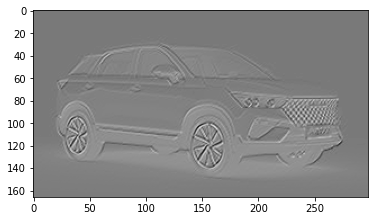

In [28]:
plt.imshow(reshape_out, cmap='gray')

### For Color Image

In [29]:
color_car.shape

(168, 300, 3)

In [30]:
row, column, channel = color_car.shape
batch = 1 #single image
reshaped_color_car_img = color_car.reshape(batch, row, column, channel)
reshaped_color_car_img.shape

(1, 168, 300, 3)

In [31]:
input_shape = reshaped_color_car_img.shape[1:]

CONV_LAYER = [
  
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


### Total trainable params = 3 * 3 * 3 + 1(bias) = 28

In [32]:
_, row, col, _ = out.shape
row, col

(166, 298)

In [33]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(166, 298)

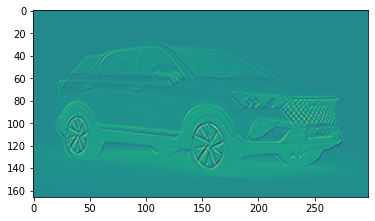

In [34]:
plt.imshow(reshape_out)

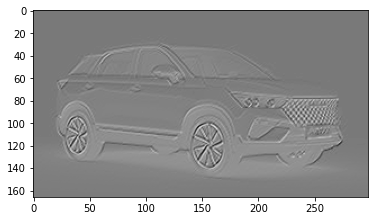

In [35]:
plt.imshow(reshape_out, cmap='gray')

In [36]:
def reshaping_image(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1, row, col, 1)
    return img

  else:
    row, col, ch = img.shape
    color_img = img.reshape(1, row, col, ch)
    return color_img

In [37]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None, padding='valid'):

  CONV_LAYER = [
  
    tf.keras.layers.Conv2D(filters=filters,
                           kernel_size=kernel_size, 
                           strides=strides, 
                           input_shape=input_shape)
    ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [38]:
def apply_conv_model_and_validate(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap='gray')
      plt.show()
  except Exception as e:
    raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



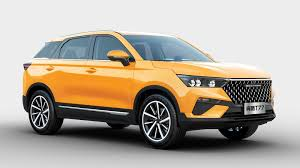

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 67ms/step
(1, 166, 298, 1)


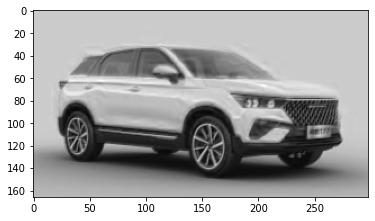

In [39]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_image(img, grayscale=False)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding='valid')
apply_conv_model_and_validate(input_img, model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



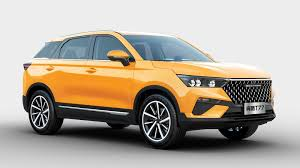

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 54ms/step
(1, 166, 298, 5)


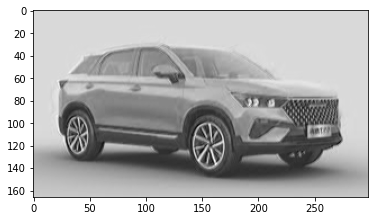

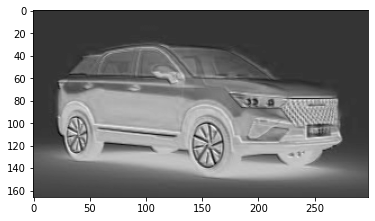

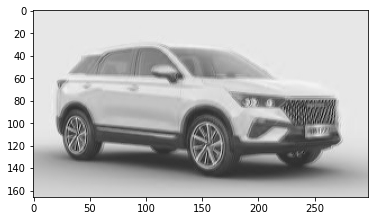

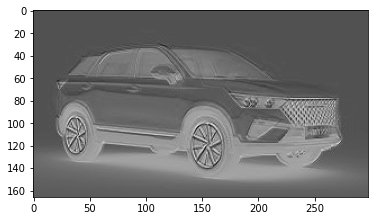

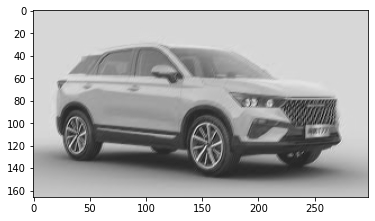

In [40]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_image(img, grayscale=False)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding='valid')
apply_conv_model_and_validate(input_img, model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 5)       50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 51ms/step
(1, 166, 298, 5)


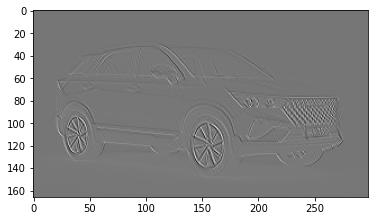

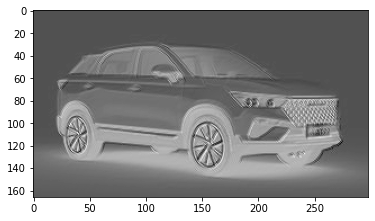

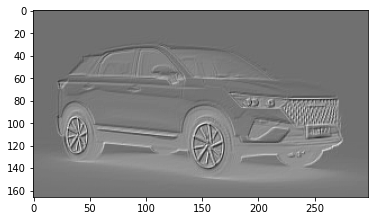

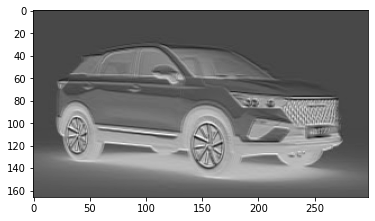

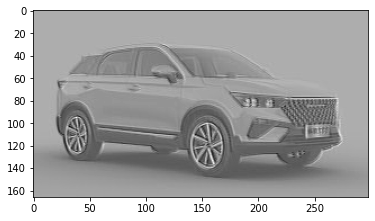

In [41]:
img = read_img(img_path, grayscale=True)
input_img = reshaping_image(img, grayscale=True)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding='valid')
apply_conv_model_and_validate(input_img, model)

In [47]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_image(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                     strides=strides)
  
  result = pooling_layer(reshaped_img)
  return result

(168, 300)


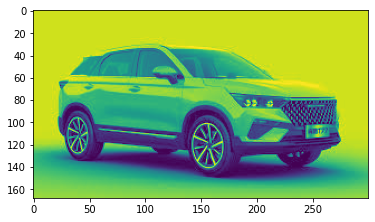

In [48]:
img = read_img(img_path)
print(img.shape)

In [49]:
result = max_pooling(img)
print(result.shape)

(1, 84, 150, 1)


In [50]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap = "gray")

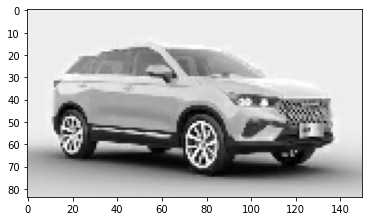

In [51]:
plot_pooling(result)

In [52]:
_, row, col, _ = result.shape
reshape = tf.reshape(result, (row, col))

In [53]:
result = max_pooling(reshape.numpy())
result.shape

TensorShape([1, 42, 75, 1])

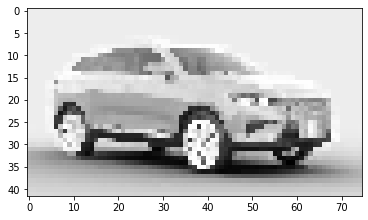

In [54]:
plot_pooling(result)